Customer features prepared and scaled
            TotalSpent  TransactionCount    AvgPrice
CustomerID                                          
C0001          3354.52                 5  278.334000
C0002          1862.74                 4  208.920000
C0003          2725.38                 4  195.707500
C0004          5354.88                 8  240.636250
C0005          2034.24                 3  291.603333
Davies-Bouldin Index: 0.9427359293109949


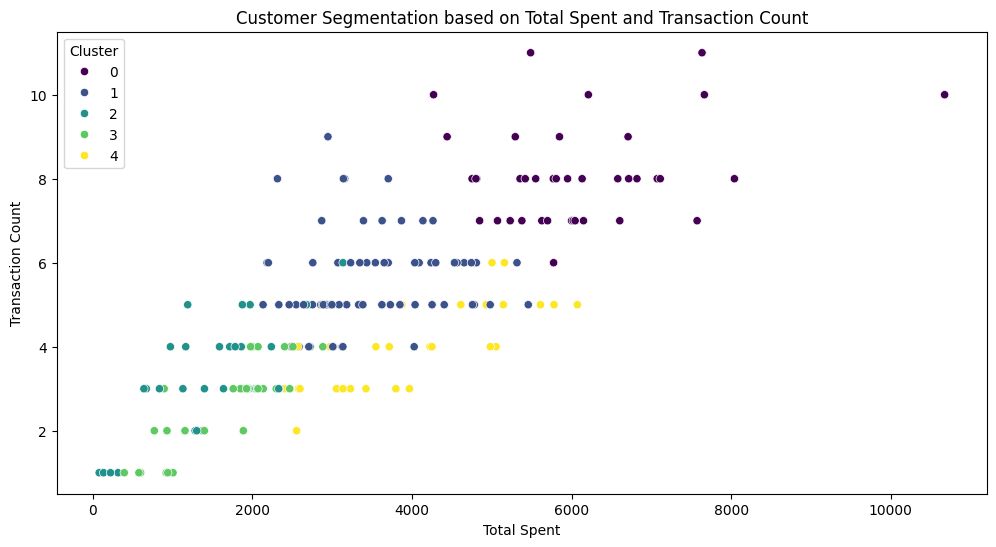

Cluster Summary:
           TotalSpent  TransactionCount    AvgPrice
Cluster                                           
0        6075.814359          8.102564  281.756511
1        3469.361690          5.563380  261.751267
2        1393.015517          3.206897  166.593580
3        1671.106333          2.633333  283.176333
4        3872.782667          3.900000  372.656050


In [26]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the customer, product, and transaction datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Merge datasets on CustomerID and ProductID to combine all necessary details
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Create customer-level features: Total spent, number of transactions, and average price
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price_y': 'mean'
}).rename(columns={
    'TotalValue': 'TotalSpent',
    'TransactionID': 'TransactionCount',
    'Price_y': 'AvgPrice'
})

# Scale the features to normalize the data for clustering
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features)

# Displaying a message indicating feature preparation and scaling
print("Customer features prepared and scaled")

# Display the first few rows of the prepared customer data
print(customer_features.head())

# Apply KMeans clustering with 5 clusters (arbitrary choice)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(customer_features_scaled)

# Add the cluster labels to the customer features dataframe
customer_features['Cluster'] = clusters

# Calculate the Davies-Bouldin Index to evaluate clustering quality
db_index = davies_bouldin_score(customer_features_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

# Plot the clusters based on Total Spent and Transaction Count
plt.figure(figsize=(12, 6))
sns.scatterplot(x=customer_features['TotalSpent'], y=customer_features['TransactionCount'], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation based on Total Spent and Transaction Count')
plt.xlabel('Total Spent')
plt.ylabel('Transaction Count')
plt.show()

# Display a summary of the clusters to understand their characteristics
cluster_summary = customer_features.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)
